In [88]:
from ripe.atlas.sagan import Result

my_results_file = "data.txt"
with open(my_results_file) as results:
    for result in results.readlines():
        parsed_result = Result.get(result)
        print(parsed_result.hops)

[<ripe.atlas.sagan.traceroute.Hop object at 0x1795b23f0>, <ripe.atlas.sagan.traceroute.Hop object at 0x1795b0830>, <ripe.atlas.sagan.traceroute.Hop object at 0x1795b1430>, <ripe.atlas.sagan.traceroute.Hop object at 0x1795b2c60>, <ripe.atlas.sagan.traceroute.Hop object at 0x1795b0800>, <ripe.atlas.sagan.traceroute.Hop object at 0x1795b1af0>, <ripe.atlas.sagan.traceroute.Hop object at 0x1795b1280>, <ripe.atlas.sagan.traceroute.Hop object at 0x1795b13a0>, <ripe.atlas.sagan.traceroute.Hop object at 0x1795b1100>]


In [89]:
import requests
from ripe.atlas.sagan import Result
from ripe.atlas.sagan import TracerouteResult
import numpy as np
from aslookup import get_as_data
import pyasn
import networkx as nx
import matplotlib.pyplot as plt

asndb = pyasn.pyasn('ipasn_db.dat')
G = nx.Graph()

measurement_ids = [100274119, 103112978]

for measurement_id in measurement_ids:
    source = 'https://atlas.ripe.net/api/v2/measurements/' + str(measurement_id)+ '/results/'
    response = requests.get(source)
    data = response.json()

    for x in data:
        parsed = TracerouteResult(x)
        path_ip = parsed.ip_path

        arr = np.array(path_ip)

        path_1 = arr[:,0]
        path_2 = arr[:,1]
        path_3 = arr[:,2]

        for path in [path_1, path_2, path_3]:
            for idx, x in enumerate(path):
                asn = asndb.lookup(x)[0]
                path[idx] = asn
            
            path = np.array(list(filter(lambda x: x != 'None', path))) # Remove NONE values
            path_size = path.size

            flat_path = [path[0]]
            for i in range(1, path_size - 1):
                x = path[i]
                last_elem = flat_path[-1]

                if x == last_elem:
                    continue
                else:
                    flat_path.append(x)

            flat_path = np.array(flat_path) 
            # print("original path", path)
            # print("flat path", flat_path)

            flat_path_size = flat_path.size
            G.add_node(flat_path[0])
            for i in range(1, flat_path_size):
                prev = flat_path[i-1]
                asn = flat_path[i]
                G.add_node(asn)
                G.add_edge(asn, prev)


nx.draw(G, with_labels=True, font_weight='bold')


TypeError: search_best() argument 1 must be str, not None

Graph with 2 nodes and 1 edges


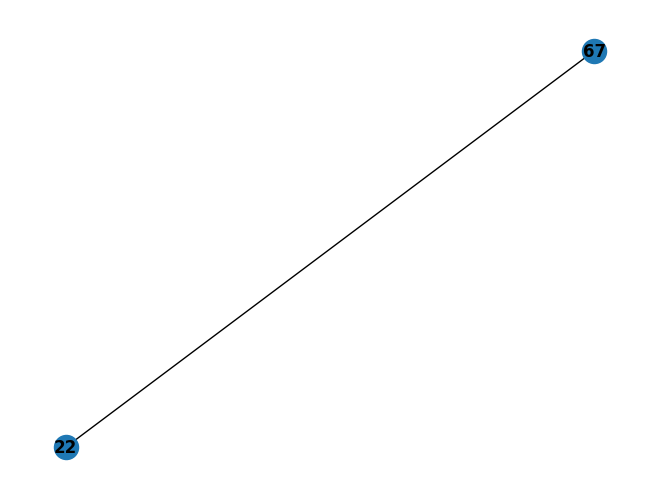

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.Graph()

G.add_node(67)
G.add_node(22)
G.add_node(22)
G.add_edge(67,22)
G.add_edge(67,22)
G.add_edge(22,67)
G.add_node(22)


print(G)
nx.draw(G, with_labels=True, font_weight='bold')

In [ ]:
import igraph as ig

g = ig.Graph()

g.add_vertex(67)
g.add_vertex(22)
print(g)

layout = g.layout("kk")
# ig.plot(g, layout=layout)
g.add_edge(67,22)

g.vs["label"] = g.vs["name"]
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ig.plot(g, layout=layout, target=ax)

IGRAPH UN-- 2 0 --
+ attr: name (v)


/var/folders/dw/2p1g8d754ygdc7vnzvm1kxd80000gn/T/ipykernel_1778/2819888328.py:5: DeprecationWarning: You are using integers as vertex names. This is discouraged because most igraph functions interpret integers as vertex _IDs_ and strings as vertex names. For sake of consistency, convert your vertex names to strings before assigning them. Future versions from igraph 0.11.0 will disallow integers as vertex names.
  g.add_vertex(67)
/var/folders/dw/2p1g8d754ygdc7vnzvm1kxd80000gn/T/ipykernel_1778/2819888328.py:6: DeprecationWarning: You are using integers as vertex names. This is discouraged because most igraph functions interpret integers as vertex _IDs_ and strings as vertex names. For sake of consistency, convert your vertex names to strings before assigning them. Future versions from igraph 0.11.0 will disallow integers as vertex names.
  g.add_vertex(22)


InternalError: Error at src/graph/type_indexededgelist.c:261: Out-of-range vertex IDs when adding edges. -- Invalid vertex ID

In [ ]:
import pyasn

# Initialize module and load IP to ASN database
# the sample database can be downloaded or built - see below
asndb = pyasn.pyasn('ipasn_db.dat')

asndb.lookup('8.8.8.8')
# should return: (15169, '8.8.8.0/24'), the origin AS, and the BGP prefix it matches

# asndb.get_as_prefixes(1128)
# # returns ['130.161.0.0/16', '131.180.0.0/16', '145.94.0.0/16'], TU-Delft prefixes

(15169, '8.8.8.0/24')

In [ ]:
a = [1,2]
print(type(a))
print(a[-1])

    # for ip in path_1:
    #     print(ip)
    #     print(type(ip))

    #     asn = asndb.lookup(ip)[0]

    #     print(asn)
    #     print(type(asn))

    #     # ip to asn

    # print(arr.shape)
    # print(path_1.shape)
    # print(path_1)
    #print(arr)
    # for ip in path_ip:
    #     print(ip)

# for result in data.readlines():
#     parsed_result = Result.get(data)
#     print(parsed_result.origin)






# print(response)
# print(source)

# parsed_result = Result.get(response)  # Parsing magic!

# print(parsed_result.hops)

# for probe_id, result in response.items():

#     result = result[0]                 # There's only one result for each probe
#     pparsed_result = Result.get(result)  # Parsing magic!

#     print(parsed_result.hops)

<class 'list'>
2


In [114]:
import requests
from ripe.atlas.sagan import TracerouteResult
from ripe.atlas.sagan import Result
import numpy as np
import pyasn
import networkx as nx
import matplotlib.pyplot as plt


n_measurement = 10

measurement_ids = np.random.randint(1, 103112978, size=n_measurement)

for measurement_id in measurement_ids:
    source = 'https://atlas.ripe.net/api/v2/measurements/' + str(measurement_id)+ '/results/'
    response = requests.get(source)
    print(type(response))
    print(response)
    data = response.json()
    data_res = data[0]

    meas = Result.get(data_res)

    print(meas.type)


    # for x in data:
    #     parsed = TracerouteResult(x)
    #     path_ip = parsed.ip_path

    #     arr = np.array(path_ip)

<class 'requests.models.Response'>
<Response [200]>
traceroute
<class 'requests.models.Response'>
<Response [200]>
ping
<class 'requests.models.Response'>
<Response [200]>
ping
<class 'requests.models.Response'>
<Response [200]>
ping
<class 'requests.models.Response'>
<Response [200]>
traceroute
<class 'requests.models.Response'>
<Response [200]>
ssl


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ripe/atlas/sagan/ssl.py:72: CryptographyDeprecationWarning: Properties that return a naïve datetime object have been deprecated. Please switch to not_valid_before_utc.
  self.valid_from = pytz.utc.localize(cert.not_valid_before)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ripe/atlas/sagan/ssl.py:73: CryptographyDeprecationWarning: Properties that return a naïve datetime object have been deprecated. Please switch to not_valid_after_utc.
  self.valid_until = pytz.utc.localize(cert.not_valid_after)


<class 'requests.models.Response'>
<Response [200]>
ping
<class 'requests.models.Response'>
<Response [401]>


KeyError: 0

In [105]:
import requests
from ripe.atlas.sagan import TracerouteResult
from ripe.atlas.sagan import Result
import numpy as np
import pyasn
import networkx as nx
import matplotlib.pyplot as plt
import json

# url = f"https://atlas.ripe.net/api/v2/measurements/?type=traceroute&status=2&is_oneoff=true&limit={limit}"
# response = requests.get(url)
# response.raise_for_status()
# data = response.json()
# return [m['id'] for m in data['results']]


# n_measurement = 10

# measurement_ids = np.random.randint(1, 103112978, size=n_measurement)

measurement_id = 12948381
source = 'https://atlas.ripe.net/api/v2/measurements/' + str(measurement_id)+ '/results/'
response = requests.get(source)
print(response)
data_r = response.json()
paska = data_r[0]
print(paska)

#print(type(json.dumps(data_r)))

asd = Result.get(paska)
print(asd.type)

#print(data)


# for measurement_id in measurement_ids:
#     source = 'https://atlas.ripe.net/api/v2/measurements/' + str(measurement_id)+ '/results/'
#     response = requests.get(source)
#     print(response)
#     data = response.json()

    

#     print()

#     # for x in data:
#     #     parsed = TracerouteResult(x)
#     #     path_ip = parsed.ip_path

#     #     arr = np.array(path_ip)

<Response [200]>
{'af': 4, 'avg': 125.109635, 'dst_addr': '125.48.77.74', 'dst_name': '125.48.77.74', 'dup': 0, 'from': '180.93.3.2', 'fw': 4910, 'group_id': 12948381, 'lts': 7, 'max': 125.109635, 'min': 125.109635, 'msm_id': 12948381, 'msm_name': 'Ping', 'prb_id': 29817, 'proto': 'ICMP', 'rcvd': 1, 'result': [{'rtt': 125.109635}], 'sent': 1, 'size': 64, 'src_addr': '192.168.1.104', 'step': None, 'stored_timestamp': 1526945025, 'timestamp': 1526945008, 'ttl': 240, 'type': 'ping'}
ping


In [173]:
import requests
from ripe.atlas.sagan import TracerouteResult
from ripe.atlas.sagan import Result
import numpy as np
import pyasn
import networkx as nx
import matplotlib.pyplot as plt
import json

limit = 10
#103155911
id = 100274119
ids = 	[100274119, 103112978, 103112523,103155911, 103156016, 103157546, 1283, 1]
ids_str = ','.join(map(str, ids))
print(ids_str)
url = f"https://atlas.ripe.net/api/v2/measurements/?type=traceroute&status=4&id={ids_str}"
response = requests.get(url)
print(response)
try:
    print(response.raise_for_status())
    data = response.json()
    res = [m['id'] for m in data['results']]
    fes = np.array(res)
    print(fes.size)
    print(fes.shape)
    print(fes)
except:
    print("error, lets move on")

100274119,103112978,103112523,103155911,103156016,103157546,1283,1
<Response [200]>
None
4
(4,)
[100274119 103112523 103112978 103155911]
